### MODEL FOR EEG NEURAL NET

In [182]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K

### GETTING Data

In [183]:
dfAwake_train = pd.read_csv('Data/training_AData.txt', header=None, delim_whitespace=True)
dfDrowsy_train = pd.read_csv('Data/training_DData.txt', header=None, delim_whitespace=True)
dfAwake_test = pd.read_csv('Data/testing_AData.txt', header=None, delim_whitespace=True)
dfDrowsy_test = pd.read_csv('Data/testing_DData.txt', header=None, delim_whitespace=True)

### Printing Retrieved Data informations

In [184]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
print(dfAwake_test.shape)
print(dfDrowsy_test.shape)

(3240000, 15)
(3240000, 15)
(1620000, 15)
(1620000, 15)


### Dropping Not Needed Columns Keeping PERCLOS

In [185]:
dfAwake_train = dfAwake_train.drop(dfAwake_train.iloc[:,11:15],axis = 1)
dfAwake_train = dfAwake_train.drop(dfAwake_train.iloc[:,0:3],axis = 1)
dfDrowsy_train = dfDrowsy_train.drop(dfDrowsy_train.iloc[:,11:15],axis = 1)
dfDrowsy_train = dfDrowsy_train.drop(dfDrowsy_train.iloc[:,0:3],axis = 1)
dfAwake_test = dfAwake_test.drop(dfAwake_test.iloc[:,11:15],axis = 1)
dfAwake_test = dfAwake_test.drop(dfAwake_test.iloc[:,0:3],axis = 1)
dfDrowsy_test = dfDrowsy_test.drop(dfDrowsy_test.iloc[:,11:15],axis = 1)
dfDrowsy_test = dfDrowsy_test.drop(dfDrowsy_test.iloc[:,0:3],axis = 1)

In [186]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
print(dfAwake_test.shape)
print(dfDrowsy_test.shape)

(3240000, 8)
(3240000, 8)
(1620000, 8)
(1620000, 8)


### RESHAPING DATA

In [187]:
dfAwake_train = dfAwake_train.to_numpy()
dfDrowsy_train = dfDrowsy_train.to_numpy()
dfAwake_train = dfAwake_train.reshape(3600,900,8)
dfDrowsy_train = dfDrowsy_train.reshape(3600,900,8)
dfAwake_test = dfAwake_test.to_numpy()
dfDrowsy_test = dfDrowsy_test.to_numpy()
dfAwake_test = dfAwake_test.reshape(1800,900,8)
dfDrowsy_test = dfDrowsy_test.reshape(1800,900,8)
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
print(dfAwake_test.shape)
print(dfDrowsy_test.shape)
# print(dfAwake.head)
# print(dfDrowsy.head)

(3600, 900, 8)
(3600, 900, 8)
(1800, 900, 8)
(1800, 900, 8)


### CREATING LABELS

In [188]:
dfAwake_trainLabels = np.zeros(3600)
print(dfAwake_trainLabels.shape)
dfDrowsy_trainLabels = np.ones(3600)
print(dfDrowsy_trainLabels.shape)
dfAwake_testLabels = np.zeros(1800)
print(dfAwake_testLabels.shape)
dfDrowsy_testLabels = np.ones(1800)
print(dfDrowsy_testLabels.shape)

(3600,)
(3600,)
(1800,)
(1800,)


In [189]:
print(dfAwake_trainLabels)
print(dfDrowsy_trainLabels)
print(dfAwake_testLabels)
print(dfDrowsy_testLabels)

[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]


### Combining Awake Data and Drowsy Data

In [190]:
dftrain = np.concatenate((dfAwake_train, dfDrowsy_train))
dftrainlabels =np.concatenate((dfAwake_trainLabels, dfDrowsy_trainLabels))
print(dftrain.shape)
print(dftrainlabels.shape)
print(dftrain)
print(dftrainlabels)

(7200, 900, 8)
(7200,)
[[[1.       2.757393 1.724006 ... 3.274563 1.257075 0.776789]
  [1.       0.504561 0.813233 ... 2.520921 0.771536 0.800058]
  [1.       0.504561 0.813233 ... 2.520921 0.771536 0.800058]
  ...
  [1.       0.62141  0.093751 ... 0.136937 0.070096 0.032042]
  [1.       0.62141  0.093751 ... 0.136937 0.070096 0.032042]
  [1.       0.040544 0.009582 ... 0.049356 0.027714 0.009525]]

 [[1.       0.504561 0.813233 ... 2.520921 0.771536 0.800058]
  [1.       0.504561 0.813233 ... 2.520921 0.771536 0.800058]
  [1.       0.504561 0.813233 ... 2.520921 0.771536 0.800058]
  ...
  [1.       0.62141  0.093751 ... 0.136937 0.070096 0.032042]
  [1.       0.040544 0.009582 ... 0.049356 0.027714 0.009525]
  [1.       0.040544 0.009582 ... 0.049356 0.027714 0.009525]]

 [[1.       0.504561 0.813233 ... 2.520921 0.771536 0.800058]
  [1.       0.504561 0.813233 ... 2.520921 0.771536 0.800058]
  [1.       0.504561 0.813233 ... 2.520921 0.771536 0.800058]
  ...
  [1.       0.040544 0.00

### SHUFFLING DATA

In [191]:
idx = np.random.permutation(len(dftrainlabels))
print(idx)

[2707 6745  518 ... 2169 5450 1951]


In [192]:
dftrain=dftrain[idx]
dftrainlabels=dftrainlabels[idx]

In [193]:
print(dftrain.shape)
print(dftrainlabels.shape)
print(dftrain)
print(dftrainlabels)

(7200, 900, 8)
(7200,)
[[[1.000000e+00 3.148220e-01 8.205700e-02 ... 1.197800e-02 1.297000e-02
   3.621000e-03]
  [1.000000e+00 1.027040e-01 3.016800e-02 ... 1.105800e-02 5.175000e-03
   3.896000e-03]
  [1.000000e+00 1.027040e-01 3.016800e-02 ... 1.105800e-02 5.175000e-03
   3.896000e-03]
  ...
  [1.000000e+00 1.096620e-01 1.973400e-02 ... 1.172400e-02 7.869000e-03
   3.454000e-03]
  [1.000000e+00 5.746675e+00 5.643340e-01 ... 1.257560e-01 1.095980e-01
   6.595800e-02]
  [1.000000e+00 5.746675e+00 5.643340e-01 ... 1.257560e-01 1.095980e-01
   6.595800e-02]]

 [[1.000000e+00 2.099341e+00 1.213539e+00 ... 6.881820e-01 3.203080e-01
   2.112640e-01]
  [1.000000e+00 2.099341e+00 1.213539e+00 ... 6.881820e-01 3.203080e-01
   2.112640e-01]
  [1.000000e+00 2.099341e+00 1.213539e+00 ... 6.881820e-01 3.203080e-01
   2.112640e-01]
  ...
  [1.000000e+00 8.939460e-01 1.057880e-01 ... 4.224580e-01 3.305270e-01
   1.616930e-01]
  [1.000000e+00 4.794180e-01 5.289900e-02 ... 1.790857e+00 7.638820e-01
 

In [194]:
dftest = np.concatenate((dfAwake_test, dfDrowsy_test))
dftestlabels =np.concatenate((dfAwake_testLabels, dfDrowsy_testLabels))
print(dftest.shape)
print(dftestlabels.shape)
print(dftest)
print(dftestlabels)

(3600, 900, 8)
(3600,)
[[[1.       0.059297 0.020334 ... 0.034427 0.027672 0.010734]
  [1.       0.288129 0.058108 ... 0.162441 0.08683  0.028186]
  [1.       0.288129 0.058108 ... 0.162441 0.08683  0.028186]
  ...
  [1.       0.066271 0.031542 ... 0.065743 0.037426 0.029351]
  [1.       0.266998 0.129318 ... 0.38657  0.157538 0.060398]
  [1.       0.266998 0.129318 ... 0.38657  0.157538 0.060398]]

 [[1.       0.288129 0.058108 ... 0.162441 0.08683  0.028186]
  [1.       0.288129 0.058108 ... 0.162441 0.08683  0.028186]
  [1.       0.288129 0.058108 ... 0.162441 0.08683  0.028186]
  ...
  [1.       0.266998 0.129318 ... 0.38657  0.157538 0.060398]
  [1.       0.266998 0.129318 ... 0.38657  0.157538 0.060398]
  [1.       0.266998 0.129318 ... 0.38657  0.157538 0.060398]]

 [[1.       0.288129 0.058108 ... 0.162441 0.08683  0.028186]
  [1.       0.288129 0.058108 ... 0.162441 0.08683  0.028186]
  [1.       0.288129 0.058108 ... 0.162441 0.08683  0.028186]
  ...
  [1.       0.266998 0.12

In [195]:
print(dftest.shape)
print(dftestlabels.shape)
print(dftrain.shape)
print(dftrainlabels.shape)

(3600, 900, 8)
(3600,)
(7200, 900, 8)
(7200,)


### Set input and output dimensions

In [196]:
input_shape = 900*8
num_classes = 2
# dftrain = dftrain.reshape(dftrain.shape[0],input_shape)
print('dftrain shape:', dftrain.shape)
print('input_shape:', input_shape)

dftrain shape: (7200, 900, 8)
input_shape: 7200


In [197]:
dftrain = dftrain.astype('float32')
dftrainlabels = dftrainlabels.astype('float32')

In [198]:
dftrainlabels_hot = np_utils.to_categorical(dftrainlabels,num_classes)
print('New dfttrainlabels shape: ', dftrainlabels_hot)

New dfttrainlabels shape:  [[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [199]:
print('New dfttrainlabels shape: ', dftrainlabels_hot.shape)
print(dftrainlabels)

New dfttrainlabels shape:  (7200, 2)
[0. 1. 0. ... 0. 1. 0.]


### Building the MODEL

In [200]:
# model_m = Sequential()
# # Remark: since coreml cannot accept vector shapes of complex shape like
# # [80,3] this workaround is used in order to reshape the vector internally
# # prior feeding it into the network
# model_m.add(Reshape((900, 1), input_shape=(input_shape,)))
# model_m.add(Dense(100, activation='relu'))
# # model_m.add(BatchNormalization()) # V2 addition
# model_m.add(Dense(100, activation='relu'))
# # model_m.add(BatchNormalization()) # V2 addition
# model_m.add(Dense(100, activation='relu'))
# # model_m.add(BatchNormalization()) # V2 addition 
# model_m.add(Flatten())
# model_m.add(Dense(num_classes, activation='softmax'))
# print(model_m.summary())

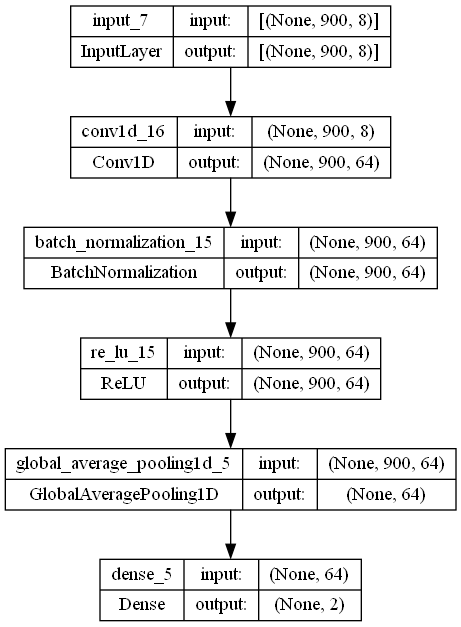

In [201]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    # conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    # conv2 = keras.layers.BatchNormalization()(conv2)
    # conv2 = keras.layers.ReLU()(conv2)

    # conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    # conv3 = keras.layers.BatchNormalization()(conv3)
    # conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv1)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=dftrain.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

### FITTING Deep neural network Model in KERAS

In [202]:
# callbacks_list = [
#     keras.callbacks.ModelCheckpoint(
#         filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
#         monitor='val_loss', save_best_only=True),
#     keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
# ]



# model_m.compile(loss='categorical_crossentropy',
#                 optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# # Hyper-parameters
# BATCH_SIZE = 400 # V3 changed to 2160
# EPOCHS = 50


# # Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
# # v1
# history = model_m.fit(dftrain,
#                       dftrainlabels_hot,
#                       batch_size=BATCH_SIZE,
#                       epochs=EPOCHS,
#                       callbacks=callbacks_list,
#                       validation_split=0.2,
#                       verbose=1)

# # # v1 completing all epochs
# # history = model_m.fit(dftrain,
# #                       dftrainlabels_hot,
# #                       batch_size=BATCH_SIZE,
# #                       epochs=EPOCHS,
# #                       validation_split=0.2,
# #                       verbose=1)

# # v3
# # history = model_m.fit(dftrain,
# #                       dftrainlabels_hot,
# #                       batch_size=BATCH_SIZE,
# #                       epochs=EPOCHS,
# #                       shuffle=True,
# #                       validation_split=0.2,
# #                       verbose=1)


In [203]:
epochs = 100
batch_size = 540

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model(eeg).h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=12, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    dftrain,
    dftrainlabels,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.4,
    verbose=1,
)

Epoch 1/100
8/8 [==============================] - 3s 340ms/step - loss: 0.6367 - sparse_categorical_accuracy: 0.6836 - val_loss: 0.6414 - val_sparse_categorical_accuracy: 0.5472 - lr: 0.0010
Epoch 2/100
8/8 [==============================] - 2s 312ms/step - loss: 0.5865 - sparse_categorical_accuracy: 0.7977 - val_loss: 0.6240 - val_sparse_categorical_accuracy: 0.5979 - lr: 0.0010
Epoch 3/100
8/8 [==============================] - 2s 307ms/step - loss: 0.5551 - sparse_categorical_accuracy: 0.7512 - val_loss: 0.6274 - val_sparse_categorical_accuracy: 0.5507 - lr: 0.0010
Epoch 4/100
8/8 [==============================] - 2s 310ms/step - loss: 0.5328 - sparse_categorical_accuracy: 0.7324 - val_loss: 0.6293 - val_sparse_categorical_accuracy: 0.5410 - lr: 0.0010
Epoch 5/100
8/8 [==============================] - 3s 319ms/step - loss: 0.5146 - sparse_categorical_accuracy: 0.7449 - val_loss: 0.6128 - val_sparse_categorical_accuracy: 0.5326 - lr: 0.0010
Epoch 6/100
8/8 [=======================

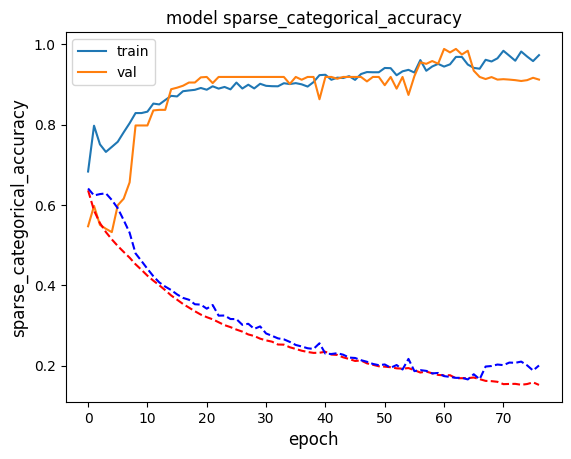

225/225 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      3600
         1.0       1.00      0.82      0.90      3600

    accuracy                           0.91      7200
   macro avg       0.92      0.91      0.91      7200
weighted avg       0.92      0.91      0.91      7200



In [204]:
# plt.figure(figsize=(6, 4))
# plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
# plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
# plt.title('Model Accuracy and Loss')
# plt.ylabel('Accuracy and Loss')
# plt.xlabel('Training Epoch')
# plt.ylim(0)
# plt.legend()
# plt.show()

metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# Print confusion matrix for training data
y_pred_train = model.predict(dftrain)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(dftrainlabels, max_y_pred_train))

### Checking against Testing Data

In [205]:

# Set input_shape / reshape for Keras
# dftest = dftest.reshape(dftest.shape[0], input_shape)

dftest = dftest.astype('float32')
dftestlabels = dftestlabels.astype('float32')

dftestlabels_hot = np_utils.to_categorical(dftestlabels, num_classes)


In [206]:
print('New dfttrainlabels shape: ', dftestlabels_hot)
print('New dfttrainlabels shape: ', dftestlabels.shape)
print('New dfttrainlabels shape: ', dftestlabels)

New dfttrainlabels shape:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
New dfttrainlabels shape:  (3600,)
New dfttrainlabels shape:  [0. 0. 0. ... 1. 1. 1.]


In [207]:
# score = model_m.evaluate(dftest, dftestlabels_hot, verbose=1)

# print('\nAccuracy on test data: %0.2f' % score[1])
# print('\nLoss on test data: %0.2f' % score[0])

In [208]:
LABELS = ['Awake','Drowsy']

In [209]:
# metric = "sparse_categorical_accuracy"
# plt.figure()
# plt.plot(history.history[metric])
# plt.plot(history.history["val_" + metric])
# plt.title("model " + metric)
# plt.ylabel(metric, fontsize="large")
# plt.xlabel("epoch", fontsize="large")
# plt.legend(["train", "val"], loc="best")
# plt.show()
# plt.close()

In [210]:
model = keras.models.load_model("best_model(eeg).h5")

test_loss, test_acc = model.evaluate(dftest, dftestlabels,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

113/113 [==============================] - 0s 3ms/step - loss: 0.3322 - sparse_categorical_accuracy: 0.9167
Test accuracy 0.9166666865348816
Test loss 0.3322135806083679


In [211]:
# # Print confusion matrix for training data
# y_pred_train = model.predict(dftest)
# # Take the class with the highest probability from the train predictions
# max_y_pred_train = np.argmax(y_pred_train, axis=1)
# print(classification_report(dftestlabels, max_y_pred_train))

113/113 [==============================] - 0s 3ms/step


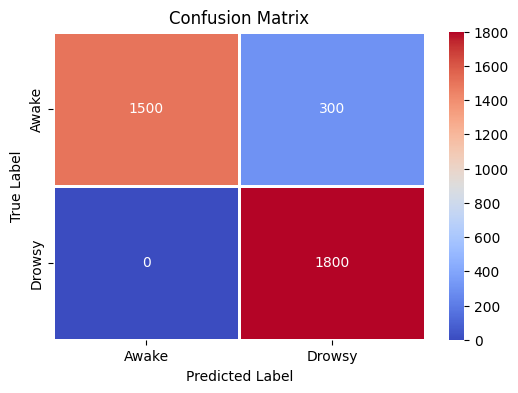

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1800
           1       0.86      1.00      0.92      1800

    accuracy                           0.92      3600
   macro avg       0.93      0.92      0.92      3600
weighted avg       0.93      0.92      0.92      3600



In [212]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(dftest)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(dftestlabels_hot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [213]:
print(y_pred_test)

[[0.8011835  0.1988164 ]
 [0.80175424 0.19824573]
 [0.8021337  0.19786635]
 ...
 [0.3273265  0.6726735 ]
 [0.32502058 0.67497945]
 [0.3143673  0.6856327 ]]
